<a href="https://colab.research.google.com/github/MrAdithya21/ML-Revisit-Journey/blob/main/Day_1_Hands_On_Practice_%E2%80%93_Train_Test_Split%2C_Overfitting%2C_and_Learning_Curves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Step 1: Setup Your Environment

In [ ]:
!pip install scikit-learn matplotlib seaborn

### Step 2: Generate Synthetic Dataset

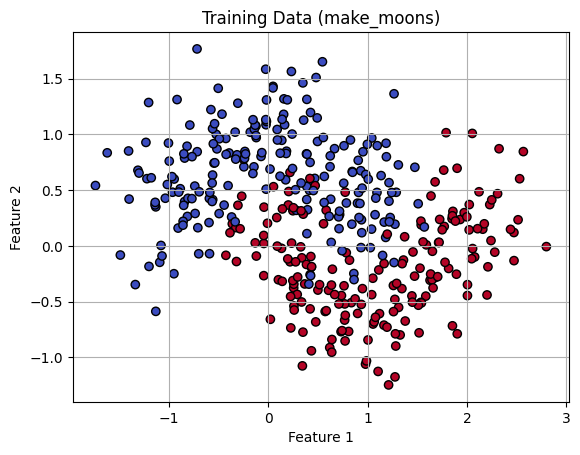

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create synthetic 2D data (nonlinear)
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolor='k')
plt.title("Training Data (make_moons)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


### Step 3: Fit and Compare Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_acc = accuracy_score(y_test, log_model.predict(X_test))

# Decision Tree (Shallow)
tree_shallow = DecisionTreeClassifier(max_depth=2)
tree_shallow.fit(X_train, y_train)
shallow_acc = accuracy_score(y_test, tree_shallow.predict(X_test))

# Decision Tree (Deep)
tree_deep = DecisionTreeClassifier(max_depth=15)
tree_deep.fit(X_train, y_train)
deep_acc = accuracy_score(y_test, tree_deep.predict(X_test))

print(f"Logistic Regression Accuracy: {log_acc:.3f}")
print(f"Shallow Tree Accuracy: {shallow_acc:.3f}")
print(f"Deep Tree Accuracy: {deep_acc:.3f}")

Logistic Regression Accuracy: 0.850
Shallow Tree Accuracy: 0.890
Deep Tree Accuracy: 0.860


### Step 4: Visualize Learning Curve

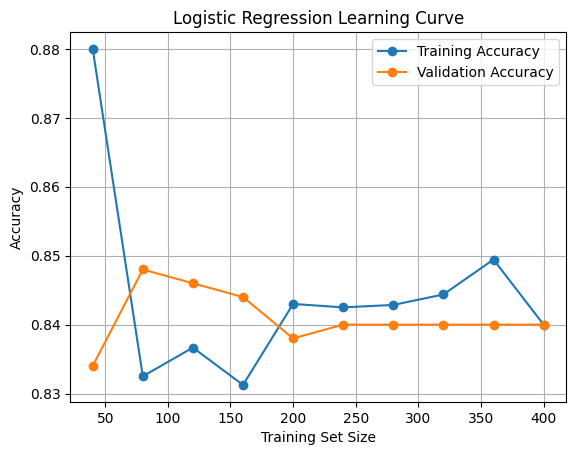

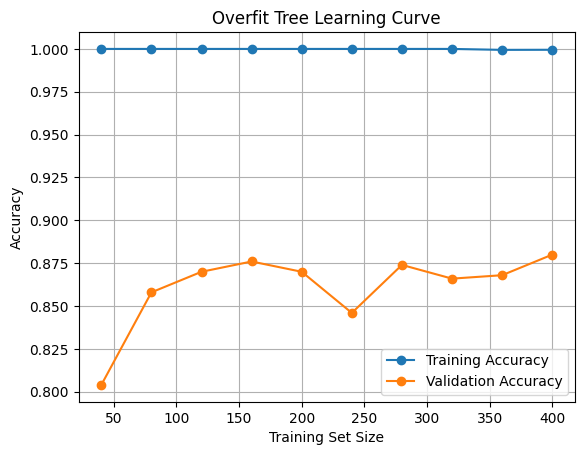

In [ ]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, title="Learning Curve"):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=5, scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
    )
    train_mean = train_scores.mean(axis=1)
    val_mean = val_scores.mean(axis=1)

    plt.plot(train_sizes, train_mean, 'o-', label='Training Accuracy')
    plt.plot(train_sizes, val_mean, 'o-', label='Validation Accuracy')
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.legend()
    plt.show()

# Run for Logistic Regression and Deep Tree
plot_learning_curve(LogisticRegression(), X, y, title="Logistic Regression Learning Curve")
plot_learning_curve(DecisionTreeClassifier(max_depth=15), X, y, title="Overfit Tree Learning Curve")

# Practice with Real-World Dataset: Breast Cancer Detection

In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Dataset shape:", X.shape)
X.head()


Dataset shape: (569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Logistic Regression
log_model = LogisticRegression(max_iter=10000)
log_model.fit(X_train, y_train)
log_acc = accuracy_score(y_test, log_model.predict(X_test))

# Shallow Tree
tree_shallow = DecisionTreeClassifier(max_depth=3)
tree_shallow.fit(X_train, y_train)
shallow_acc = accuracy_score(y_test, tree_shallow.predict(X_test))

# Deep Tree
tree_deep = DecisionTreeClassifier(max_depth=20)
tree_deep.fit(X_train, y_train)
deep_acc = accuracy_score(y_test, tree_deep.predict(X_test))

print(f"Logistic Regression Accuracy: {log_acc:.3f}")
print(f"Shallow Tree Accuracy: {shallow_acc:.3f}")
print(f"Deep Tree Accuracy: {deep_acc:.3f}")

Logistic Regression Accuracy: 0.974
Shallow Tree Accuracy: 0.939
Deep Tree Accuracy: 0.947


In [ ]:
def plot_learning_curve(model, X, y, title="Learning Curve"):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=5, scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
    )
    train_mean = train_scores.mean(axis=1)
    val_mean = val_scores.mean(axis=1)

    plt.plot(train_sizes, train_mean, 'o-', label='Training Accuracy')
    plt.plot(train_sizes, val_mean, 'o-', label='Validation Accuracy')
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.legend()
    plt.show()

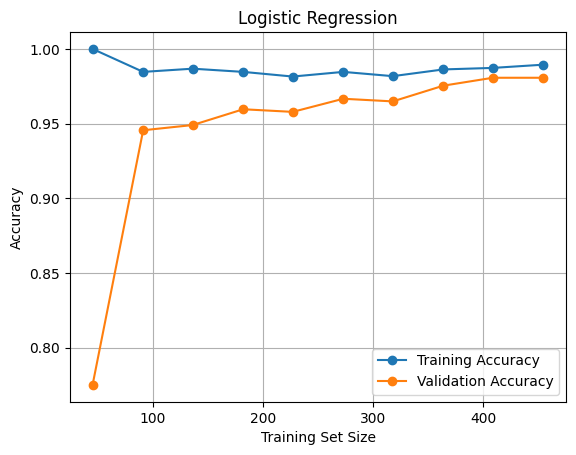

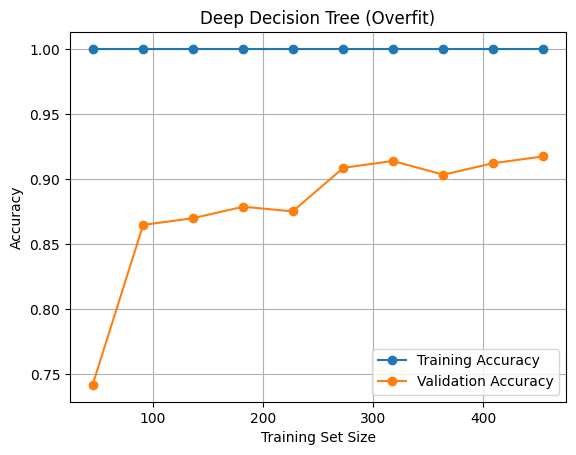

In [ ]:
plot_learning_curve(LogisticRegression(max_iter=10000), X_scaled, y, title="Logistic Regression")
plot_learning_curve(DecisionTreeClassifier(max_depth=20), X_scaled, y, title="Deep Decision Tree (Overfit)")